In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Dropout, SimpleRNN, LSTM,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.utils import resample
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


Found 5993 files belonging to 10 classes.
Using 4795 files for training.
Found 5993 files belonging to 10 classes.
Using 1198 files for validation.
Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 96s 620ms/step - accuracy: 0.6651 - loss: 1.0423 - val_accuracy: 0.8130 - val_loss: 0.5813
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 86s 575ms/step - accuracy: 0.8471 - loss: 0.4844 - val_accuracy: 0.8564 - val_loss: 0.4878
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 84s 556ms/step - accuracy: 0.8916 - loss: 0.3312 - val_accuracy: 0.8790 - val_loss: 0.4044
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 86s 570ms/step - accuracy: 0.9335 - loss: 0.2178 - val_accuracy: 0.8681 - val_loss: 0.4961
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 86s 572ms/step - accuracy: 0.9493 - loss: 0.1621 - val_accuracy: 0.8623 - val_loss: 0.5293
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 83s 554ms/step - accuracy: 0.9618 - loss: 0.1176 - val_accuracy: 0.8856 - val_loss: 0.4848
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 83s 555ms/step - accuracy:

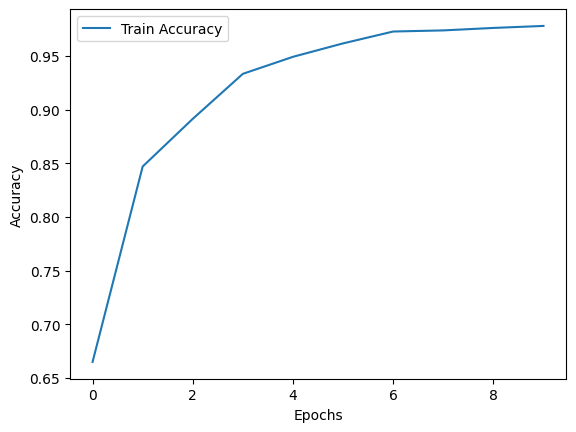

In [14]:
data_dir=r"C:\Users\Manoj\Downloads\archive\Apparel images dataset new"
img_size = (128,128)
batch_size=32


train_data=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

validation_data=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

norm = layers.Rescaling(1./255)

train_data = train_data.map(lambda x,y:(norm(x), y)).prefetch(tf.data.AUTOTUNE)
validation_data = validation_data.map(lambda x,y:(norm(x), y)).prefetch(tf.data.AUTOTUNE)



model = models.Sequential([
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax') 
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(train_data,
          validation_data=validation_data,
          epochs=10)

test_loss, test_acc = model.evaluate(validation_data)
print("Validation Accuracy:", test_acc)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()